In [1]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os

%matplotlib inline

The type of this input is <class 'numpy.ndarray'>
Shape: (232, 320, 3)


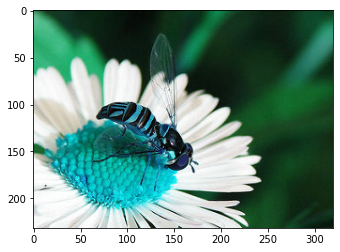

In [2]:
image = cv2.imread('images/sample.jpg')
print("The type of this input is {}".format(type(image)))
print("Shape: {}".format(image.shape))
plt.imshow(image)



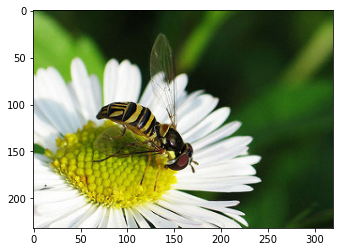

In [3]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

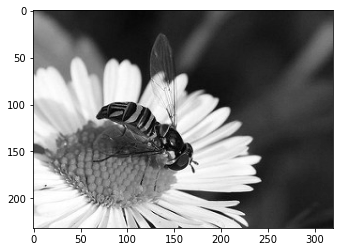

In [4]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')

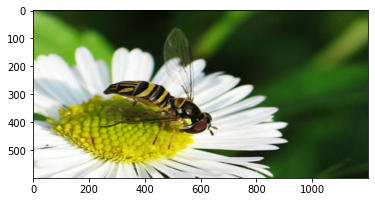

In [5]:
resized_image = cv2.resize(image, (1200, 600))
plt.imshow(resized_image)

In [6]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [7]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image =cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [8]:
def get_colors(image,number_of_colors,show_chart):
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    clf = KMeans(n_clusters =number_of_colors )
    labels = clf.fit_predict(modified_image)
    counts = Counter(labels)

    center_colors = clf.cluster_centers_
    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]

    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)

    return rgb_colors
    

[array([239.74681269, 240.38299962, 237.63127534]),
 array([ 89.19512058, 106.78820149,  27.26121253]),
 array([156.04903804, 170.28815276, 129.16215825]),
 array([129.19699074, 159.83373843,  37.87314815]),
 array([204.62332207, 211.49589079, 203.8350379 ]),
 array([40.26116458, 74.84137645, 20.37542985]),
 array([196.50692964, 191.34145599,  13.89788303]),
 array([21.71942937, 38.43931802, 14.34946416])]

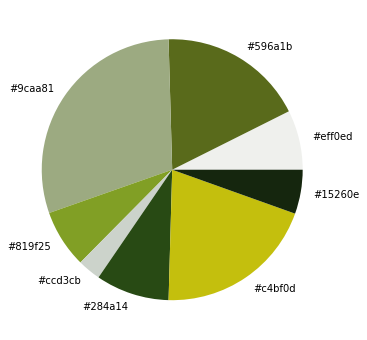

In [9]:
get_colors(get_image('images/sample.jpg'), 8, True)

In [10]:
IMAGE_DIRECTORY = 'images'
COLORS = {
    'GREEN': [0, 128, 0],
    'BLUE': [0, 0, 128],
    'YELLOW': [255, 255, 0],
    'WHITE' : [255,255,255]
}
images = []

for file in os.listdir(IMAGE_DIRECTORY):
    if not file.startswith('.'):
        images.append(get_image(os.path.join(IMAGE_DIRECTORY, file)))

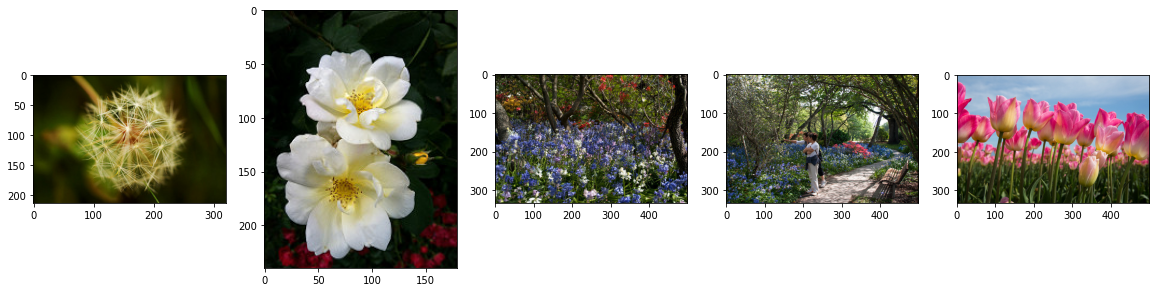

In [11]:
plt.figure(figsize=(20, 10))
for i in range(5):
    plt.subplot(1,5, i+1)
    plt.imshow(images[i])


In [12]:
def match_image_by_color(image, color, threshold = 60, number_of_colors = 10): 
    
    image_colors = get_colors(image, number_of_colors, False)
    selected_color = rgb2lab(np.uint8(np.asarray([[color]])))

    select_image = False
    for i in range(number_of_colors):
        curr_color = rgb2lab(np.uint8(np.asarray([[image_colors[i]]])))
        diff = deltaE_cie76(selected_color, curr_color)
        if (diff < threshold):
            select_image = True
    
    return select_image

In [13]:
def show_selected_images(images, color, threshold, colors_to_match):
    index = 1
    count=0
    dis=[]
    for i in range(len(images)):
        selected = match_image_by_color(images[i],
                                        color,
                                        threshold,
                                        colors_to_match)
#         ims = np.random.randn(5, 224, 224)
        if (selected):
            plt.subplot(1, 5, index)
            plt.imshow(images[i])
            index+=1
            count+=1
        if count ==5:
            break


###  Yellow Colour colour flower sample 5 flowers

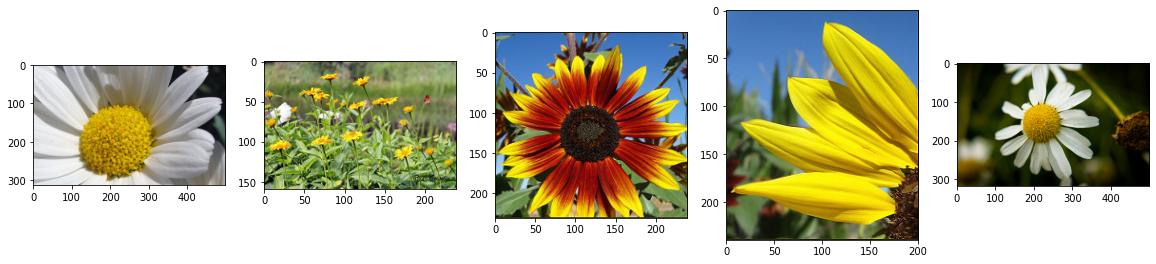

In [14]:
plt.figure(figsize = (20, 10))
show_selected_images(images,COLORS['YELLOW'], 60, 5)

### white colour sample 

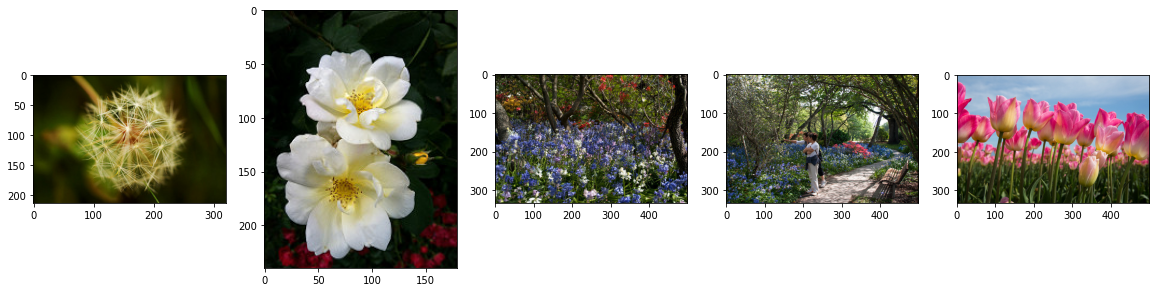

In [19]:
plt.figure(figsize = (20, 10))
show_selected_images(images,COLORS['WHITE'], 60, 5)

### Blue colour sample

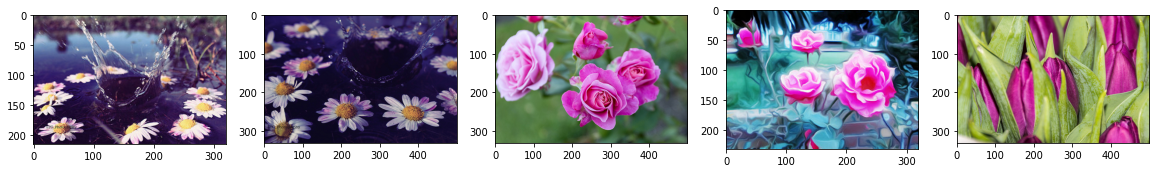

In [20]:
plt.figure(figsize = (20, 10))
show_selected_images(images,COLORS['BLUE'], 60, 5)